In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="2"

import fastai
from fastai.vision import *
from fastai.metrics import accuracy
from fastai.core import *
from fastai.metrics import error_rate # 1 - accuracy

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
#paths
char_path="/mnt/ssd_data/ocr_dev/for_US/char_lib/"
model_path='/mnt/ssd_data/ocr_dev/models/'

#create image list
all_images=[]
for subdir, dirs, files in os.walk(char_path):
    for file in files:
        if file.startswith(".DS_Store") or file.startswith("models"):
            pass
        else:
            list_of_images=os.path.join(subdir, file)
            all_images.append(list_of_images)
        #print (os.path.join(subdir, file))
#all_images=all_images[1:] #get rid of .ds_store folder

print(len(all_images))


14302


In [3]:
# create classes from the folder list names
folderlist = []
for x in all_images:
    split_results = x.split('/')
    file=split_results[6] # change this parameter depending on the length of the path
    if file.startswith(".DS_Store") or file.startswith("models"):
        pass
     # Now you have a tuple of the results of your split
    else:# add the second item to the new list
        folderlist.append(file)

#print(len(folderlist))

folder_set=set(folderlist)

print("No. of labels: {}".format(len(set(folder_set))))
print("-----------------")


for l in folder_set:
    print("{}, {} files".format(l, len(os.listdir(char_path+l))))
    

No. of labels: 207
-----------------
LM, 67 files
Se, 37 files
ANY, 2 files
DE2, 2 files
UD, 278 files
mUI, 3 files
ma, 2 files
IS, 7 files
D60, 1 files
D6, 230 files
IN, 7 files
derby, 2 files
UY, 125 files
DE, 6 files
UQ, 40 files
LU, 36 files
BY, 2 files
DG, 3 files
D8, 245 files
DTRI, 4 files
plc, 17 files
D5, 247 files
UJ, 49 files
OL, 2 files
FSLASH, 4 files
CE, 3 files
BARR, 2 files
ROLLS, 4 files
D9, 248 files
NOT, 5 files
IF, 2 files
UC, 343 files
AC, 5 files
PLUSMIN, 7 files
D686085, 1 files
SIO, 5 files
UH, 185 files
m8BJ, 2 files
LF, 30 files
mNS, 3 files
D3, 307 files
TT, 4 files
WHOLE, 2 files
BR, 5 files
Sperc, 14 files
TY, 5 files
D40, 5 files
OR, 13 files
LD, 107 files
UR, 423 files
SS, 14 files
IR, 2 files
D17, 2 files
Sdoll, 37 files
ON, 8 files
ED, 4 files
ER, 6 files
NGU, 3 files
UV, 73 files
UL, 273 files
D61, 1 files
RA, 6 files
HA, 1 files
UZ, 10 files
BOX, 3 files
LARR, 5 files
Shy, 23 files
STL, 3 files
LA, 119 files
D10, 5 files
UW, 106 files
NC, 530 files
Sl

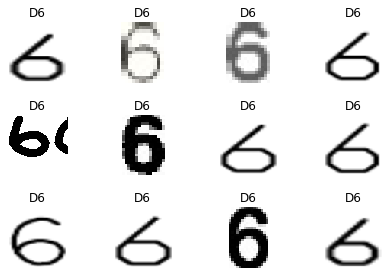

In [4]:
# check selection of loaded images

fig, ax = plt.subplots(nrows=3, ncols=4)
fig.tight_layout()
cnt = 2
for row in ax:
    for col in row:
        image_name = np.random.choice(os.listdir(char_path + folderlist[cnt]))
        if image_name.startswith(".DS_Store"):
            pass
        else:
            im = Image.open(char_path+"{}/{}".format(folderlist[cnt],image_name))
            col.imshow(im)
            col.set_title(folderlist[cnt])
            col.axis('off')
        cnt += 1
plt.show()


In [5]:
#create fastai model
size = 224 # size of the input
bs = 64 # batch size, will be worth testing the batch size depending on the processing power 
classes=folder_set

# create a variable called data in which we place the ImageDataBunch object
#np.random.seed(42)

data = ImageDataBunch.from_folder("/mnt/ssd_data/ocr_dev/char_lib/",  
                                  ds_tfms=get_transforms(do_flip=False, flip_vert=False,
                                                        max_lighting=0.2), #returns a list of available image transformations upon call
                                             #controls vertical flips and 90° turns in addition to just horizontal flips
                                  train='.',
                                  valid_pct=0.2,  #controls the percentage of images that will be randomly chosen to be in the validation set
                                  size=size, 
                                  bs=bs) 


/home/aihub/anaconda3/lib/python3.7/site-packages/fastai/data_block.py:534: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
DARR, D686085, PP, REED, Msign...
  if getattr(ds, 'warn', False): warn(ds.warn)


In [6]:
# check the classes have been loaded correctly with data
data.classes


['AC',
 'AL',
 'AND',
 'ANY',
 'AP',
 'BLBOX',
 'BOX',
 'BR',
 'BSLASH',
 'BY',
 'Bel',
 'CE',
 'CH',
 'CI',
 'CONT',
 'D0',
 'D00',
 'D1',
 'D10',
 'D12',
 'D17',
 'D19',
 'D190',
 'D2',
 'D20',
 'D23',
 'D25',
 'D28',
 'D3',
 'D30',
 'D31',
 'D4',
 'D40',
 'D5',
 'D50',
 'D6',
 'D60',
 'D61',
 'D7',
 'D70',
 'D8',
 'D9',
 'D90',
 'DBLARR',
 'DE',
 'DE2',
 'DEG',
 'DG',
 'DI',
 'DOT',
 'DR',
 'DRA',
 'DTRI',
 'ED',
 'ER',
 'FSLASH',
 'GR',
 'H - Lines',
 'HA',
 'HR',
 'IC',
 'IF',
 'IG',
 'IN',
 'IO',
 'ION',
 'IR',
 'IS',
 'LA',
 'LARR',
 'LB',
 'LC',
 'LD',
 'LE',
 'LF',
 'LG',
 'LH',
 'LI',
 'LJ',
 'LK',
 'LL',
 'LM',
 'LN',
 'LO',
 'LP',
 'LQ',
 'LR',
 'LS',
 'LT',
 'LU',
 'LY',
 'MB',
 'MI',
 'NC',
 'NG',
 'NGU',
 'NL',
 'NO',
 'NOT',
 'NOTE',
 'OC',
 'OD',
 'OF',
 'OL',
 'ON',
 'OR',
 'OS',
 'PE',
 'PLUSMIN',
 'PO',
 'POS',
 'PPR',
 'PR',
 'RA',
 'RARR',
 'RE',
 'ROLLS',
 'ROYCE',
 'Rolls Royce',
 'SC',
 'SEMI',
 'SI',
 'SIO',
 'SO',
 'SP',
 'SS',
 'ST',
 'STD',
 'STL',
 'Sand',

In [ ]:

#check images and assigned classes
data.show_batch(rows=3, figsize=(7, 8))

In [ ]:
#normalize the data in our object
data.normalize(imagenet_stats) #using a ResNet architecture for our model which was trained on ImageNet

In [12]:
#create the actual network and train it
#specify the ResNet architecture as our base model for transfer learning

learner = cnn_learner(data, models.resnet50, metrics=[accuracy], callback_fns=ShowGraph) 


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


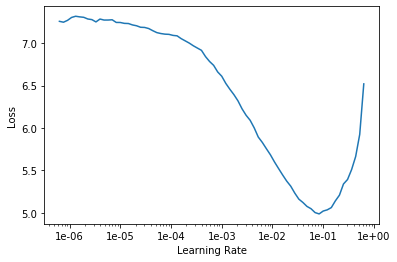

In [14]:
learner.lr_find()
learner.recorder.plot()
#choose a learning rate, for which the loss is still decreasing, 
#i.e. we do not want the learning rate with the minimum loss, but with the steepest slope

epoch,train_loss,valid_loss,accuracy,time
0,2.017154,1.341102,0.678471,00:42
1,1.340666,1.011130,0.769635,00:42
2,1.093250,0.670304,0.826087,00:43
3,0.850165,0.551210,0.838359,00:41
4,0.700774,0.479997,0.862553,00:41
5,0.590298,0.433841,0.869215,00:41
6,0.513468,0.396236,0.872370,00:41
7,0.432973,0.346079,0.890603,00:41
8,0.327185,0.316273,0.894460,00:40
9,0.322953,0.310529,0.894811,00:42


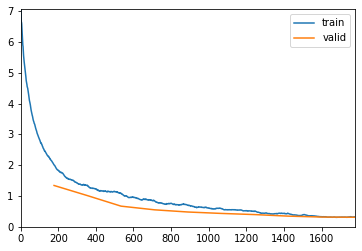

In [15]:
learner.fit_one_cycle(10, max_lr=slice(1e-3, 1e-2))

In [16]:
#where the algorithm is making the most mistakes
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)


[('LS', 'US', 64),
 ('US', 'LS', 23),
 ('D0', 'LO', 13),
 ('LJ', 'UJ', 6),
 ('LO', 'D0', 6),
 ('lines', 'pixels', 5),
 ('LC', 'UC', 4),
 ('LF', 'LT', 4),
 ('NC', 'pixels', 4),
 ('UE', 'UF', 4),
 ('pixels', 'lines', 4),
 ('NC', 'D1', 3),
 ('NC', 'Sdi', 3),
 ('NG', 'mNC', 3),
 ('UC', 'LC', 3),
 ('UJ', 'LJ', 3),
 ('UO', 'LO', 3),
 ('lines', 'UI', 3),
 ('BLBOX', 'pixels', 2),
 ('Bel', 'mu', 2),
 ('D10', 'mu', 2),
 ('IN', 'ANY', 2),
 ('LK', 'UK', 2),
 ('LL', 'LT', 2),
 ('LQ', 'D9', 2),
 ('NC', 'BLBOX', 2),
 ('ON', 'UO', 2),
 ('RE', 'mu', 2),
 ('Sdi', 'mu', 2),
 ('UB', 'D8', 2),
 ('UH', 'mu', 2),
 ('UM', 'mu', 2),
 ('UN', 'mu', 2),
 ('UR', 'D8', 2),
 ('UR', 'mu', 2)]

epoch,train_loss,valid_loss,accuracy,time
0,0.315048,0.309101,0.891655,00:55
1,0.298351,0.312940,0.895512,00:54
2,0.323916,0.322973,0.886045,00:54
3,0.324016,0.315869,0.882889,00:54
4,0.310079,0.310330,0.888850,00:55
5,0.281421,0.296869,0.898317,00:54
6,0.266102,0.289650,0.899018,00:54
7,0.254562,0.297314,0.894460,00:54
8,0.235429,0.282671,0.898317,00:54
9,0.223904,0.276870,0.900070,00:55


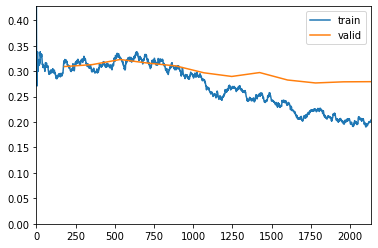

In [17]:
#Unfreezing and fine-tuning

#save the weights beforhand, so that we can go back in case we need to revert

learner.save(model_path+"stage-1")
#learner.load(‘stage-1’)
learner.unfreeze()
learner.fit_one_cycle(12, max_lr=slice(1e-5, 1e-4))

In [18]:
#predict on single image
img = learner.data.train_ds[8200][0]
learner.predict(img)

(Category UW,
 tensor(174),
 tensor([2.6656e-08, 1.7670e-08, 1.7491e-08, 7.3247e-08, 1.0564e-08, 9.8083e-10,
         8.9319e-10, 4.4920e-10, 2.1923e-11, 1.6728e-08, 2.2118e-08, 3.4577e-10,
         4.8464e-11, 7.0634e-10, 1.4530e-09, 1.1956e-08, 2.1886e-08, 9.4258e-10,
         6.9510e-08, 1.4897e-08, 3.3374e-09, 2.2292e-08, 2.0076e-09, 1.5807e-08,
         2.5744e-09, 3.0128e-08, 7.1233e-09, 8.2267e-09, 1.8718e-08, 6.1181e-10,
         3.8847e-08, 1.1602e-09, 9.0577e-10, 3.7898e-09, 4.7265e-11, 8.3516e-09,
         1.0571e-09, 1.8665e-09, 2.4141e-09, 4.2141e-08, 5.0654e-09, 5.9623e-10,
         3.1218e-10, 5.5177e-09, 2.1494e-09, 1.8462e-10, 2.6748e-09, 1.9068e-10,
         1.9889e-09, 7.7645e-10, 2.9429e-09, 2.7982e-09, 2.6361e-09, 1.9323e-08,
         5.2716e-11, 9.4256e-12, 1.0731e-07, 9.3808e-10, 6.3524e-09, 1.3069e-09,
         2.8108e-09, 1.4539e-09, 1.2834e-09, 2.7804e-10, 7.5087e-07, 1.2037e-09,
         3.5310e-08, 4.3972e-09, 3.5041e-10, 2.0742e-10, 8.8477e-10, 2.9699e-10,


In [19]:
learner.save(model_path+"char_classifier", return_path=True)

learn = learner.load(model_path+"char_classifier")
learn.export(model_path+'char_classifier.pkl')

In [20]:
# this will output the export.pkl file which is used for the processing
#it is saved on char_path set at the top by default
learn.export()
learn = load_learner(learn.path)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


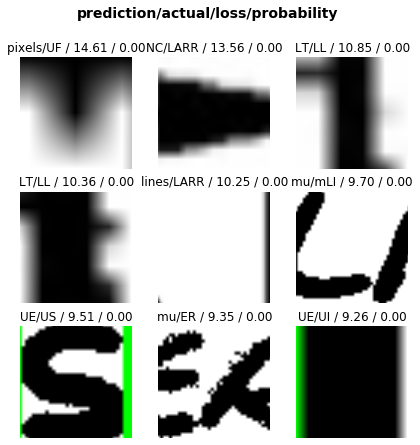

In [21]:
learn = cnn_learner(data, models.resnet50)
learn.fit(1)
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)
interp.plot_top_losses(9, figsize=(7,7))


In [22]:
#check most confused, these are usually similiar characters
interp.most_confused()

[('US', 'LS', 66),
 ('LS', 'US', 19),
 ('D0', 'LO', 14),
 ('D6', 'D8', 10),
 ('UE', 'UF', 10),
 ('NC', 'lines', 8),
 ('D1', 'UT', 7),
 ('D9', 'LG', 7),
 ('LH', 'LN', 7),
 ('UO', 'LO', 7),
 ('pixels', 'lines', 7),
 ('LG', 'D8', 6),
 ('LM', 'LN', 6),
 ('LO', 'D0', 6),
 ('UC', 'LC', 6),
 ('UE', 'mu', 6),
 ('UO', 'D0', 6),
 ('lines', 'NC', 6),
 ('D0', 'LN', 5),
 ('D1', 'UI', 5),
 ('D6', 'LO', 5),
 ('LF', 'LT', 5),
 ('LT', 'UT', 5),
 ('UD', 'LN', 5),
 ('UM', 'UN', 5),
 ('D2', 'D7', 4),
 ('D3', 'D2', 4),
 ('LA', 'LE', 4),
 ('LB', 'LN', 4),
 ('LJ', 'UJ', 4),
 ('Srb', 'UJ', 4),
 ('UN', 'UM', 4),
 ('D0', 'UA', 3),
 ('D2', 'D5', 3),
 ('D9', 'UP', 3),
 ('IO', 'D0', 3),
 ('LU', 'UU', 3),
 ('NC', 'BSLASH', 3),
 ('Splus', 'D4', 3),
 ('UA', 'mu', 3),
 ('UD', 'D0', 3),
 ('UD', 'LO', 3),
 ('UD', 'mu', 3),
 ('UE', 'UP', 3),
 ('UJ', 'LJ', 3),
 ('UM', 'UW', 3),
 ('UT', 'UF', 3),
 ('UU', 'LN', 3),
 ('lines', 'BLBOX', 3),
 ('mu', 'UR', 3),
 ('pixels', 'LT', 3),
 ('BLBOX', 'NC', 2),
 ('CE', 'LS', 2),
 ('D0',